Update figures by the new CI calcualted from `build_models_11.ipynb`.

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
#plt.style.use('seaborn-colorblind')
#plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True


%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Draw predictions in training set

In [2]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20220629.csv', index_col=0)
predict_df = pd.read_csv('results/predict_20220629.csv', index_col=0)
area_df = pd.read_csv('data/CaBr_20220701.csv', index_col=0)

20220703


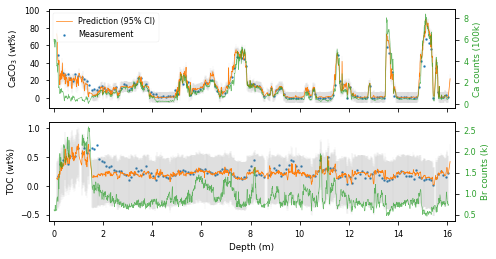

In [5]:
core = 'SO264-55-1'
fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')

X = predict_df[predict_df.core == core]
aa = area_df[area_df.core == core]

for ax, measurement, conf_int in zip(axes, ['CaCO3', 'TOC'], [[6.77, 5.91], [0.54, 0.30]]):
    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        alpha=.6, ecolor='grey', linewidth=.1, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)
        
    ax.plot(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)],
        linewidth=.7, c='C1', label='Prediction (95% CI)')
    
    ax2 = ax.twinx()
    
    if measurement == 'CaCO3':
        ax.set_ylabel('CaCO$_3$ (wt%)')
        ax.set_xlim(-.2, 16.3)
        ax.legend(loc='upper left')
        ax2.plot(aa.depth_cm*.01, aa.Ca_Area*.00001, c='C2', lw=.6, alpha=.7, label='Ca area')
        ax2.set_ylabel('Ca counts (100k)', c='C2')
        ax2.tick_params(axis='y', labelcolor='C2')
        #ax2.legend(loc='upper right')
    else:
        ax.set_ylabel('TOC (wt%)')
        ax.set_xlabel('Depth (m)')
        ax2.plot(aa.depth_cm*.01, aa.Br_Area*.001, c='C2', lw=.6, alpha=.7, label='Br area')
        ax2.set_ylabel('Br counts (k)', c='C2')
        ax2.tick_params(axis='y', labelcolor='C2')
        #ax2.legend(loc='upper right')
       

fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_{}_{}.png'.format(core, date))
print(date)

# Draw case study cores

20220703


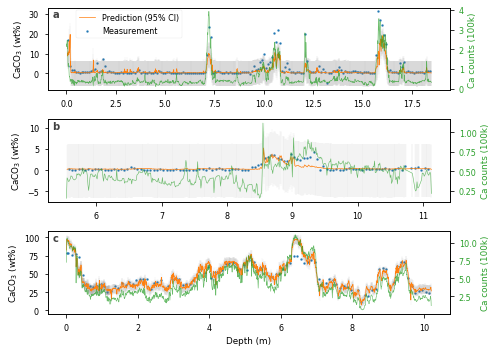

In [7]:
cores = ['SO264-69-2', 'LV28-44-3-n', 'PS75-056-1']
measurement = 'CaCO3'
conf_int = [6.77, 5.91]

fig, axes = plt.subplots(3, 1, figsize=(7, 5))

for core, ax, no in zip(cores, axes, ['a', 'b', 'c']):
    X = predict_df[predict_df.core == core]
    aa = area_df[area_df.core == core]

    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        alpha=.6, ecolor='grey', linewidth=.1, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)
        
    ax.plot(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)],
        linewidth=.7, c='C1', label='Prediction (95% CI)')

    ax.set_ylabel('CaCO$_3$ (wt%)')
    #ax.set_xlim(-.3, 18.8)
    ax.text(
        .01, .88, no, c='#424242',
        fontweight = 'bold', transform=ax.transAxes
    )
        
    ax2 = ax.twinx()
    ax2.plot(aa.depth_cm*.01, aa.Ca_Area*.00001, c='C2', lw=.6, alpha=.7)
    ax2.set_ylabel('Ca counts (100k)', c='C2')
    ax2.tick_params(axis='y', labelcolor='C2')
    #ax2.legend(loc='upper right')

    axes[0].legend(loc=(.07, .63))
    axes[2].set_xlabel('Depth (m)')
fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_case_{}_{}.png'.format(measurement, date))
print(date)

20220703


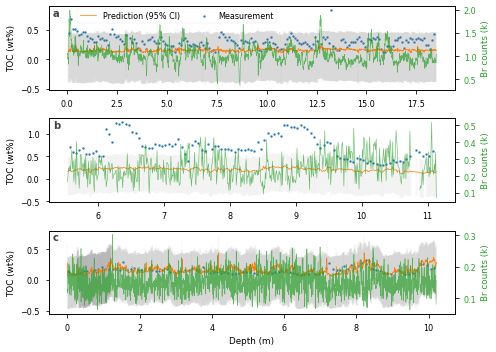

In [14]:
cores = ['SO264-69-2', 'LV28-44-3-n', 'PS75-056-1']
measurement = 'TOC'
conf_int = [0.54, 0.30]

fig, axes = plt.subplots(3, 1, figsize=(7, 5))

for core, ax, no in zip(cores, axes, ['a', 'b', 'c']):
    X = predict_df[predict_df.core == core]
    aa = area_df[area_df.core == core]

    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        alpha=.6, ecolor='grey', linewidth=.1, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)
        
    ax.plot(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)],
        linewidth=.7, c='C1', label='Prediction (95% CI)')

    ax.set_ylabel('TOC (wt%)')
    ax.text(
        .01, .88, no, c='#424242',
        fontweight = 'bold', transform=ax.transAxes
    )
        
    ax2 = ax.twinx()
    ax2.plot(aa.depth_cm*.01, aa.Br_Area*.001, c='C2', lw=.6, alpha=.7)
    ax2.set_ylabel('Br counts (k)', c='C2')
    ax2.tick_params(axis='y', labelcolor='C2')

    axes[0].legend(loc=(.07, .8), ncol=2)
    axes[2].set_xlabel('Depth (m)')
fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_case_{}_{}.png'.format(measurement, date))
print(date)